# Логистическая регрессия

Логистическая регрессия определяет принадлежность объекта к какому-то из двух классов:

$$ f_{W,b}(x) = \sigma (W \vec{x} + b) $$

Введем функцию потерь:

$$ Loss(W, b) = BinaryCrossentropy(Ц, b) = -\sum_{i=1}^{N}(y_i \log (f_{W}(x_i)) + (1 - y_i) \log (1 - f_{W,b}(x_i)) $$

Подбор параметров линейной регрессии основывается на минимизации функции потерь.

Частные производные по параметрам:

$$ \frac{\partial Loss}{\partial W}(W, b) = \frac{1}{N} X^T (\sigma (W x_i + b) - y_i) $$

$$ \frac{\partial Loss}{\partial b}(W, b) = \frac{1}{N} \sum_{i=1}^N (\sigma (W x_i + b) - y_i) $$

Найти оптимум функции потерь можно с помощью градиентного спуска:

$$ W_{updated} = W - \lambda \frac{\partial Loss}{\partial W}(W, b) $$

$$ b_{updated} = b - \lambda \frac{\partial Loss}{\partial b}(W, b) $$

In [293]:
import numpy as np

In [294]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [295]:
class LogisticRegression:

    def __init__(self, W: np.ndarray = None, b: np.ndarray = None):
        self.W = W
        self.b = b

    @staticmethod
    def log_loss(Y_predicted: np.ndarray, Y: np.ndarray):
        return -np.mean(Y * np.log(Y_predicted) + (1 - Y) * np.log(1 - Y_predicted))
    @staticmethod
    def log_loss_grads(X: np.ndarray, Y_predicted: np.ndarray, Y: np.ndarray):
        N = X.shape[0]
        dW = (1 / N) * np.dot(X.T, (Y_predicted - Y))
        db = (1 / N) * np.sum(Y_predicted - Y)
        return dW, db

    def predict_probability(self, X: np.ndarray):
        return sigmoid(X @ self.W.T  + self.b)
    def predict(self, X: np.ndarray, threshold=0.5):
        return (self.predict_probability(X) >= threshold).astype(int)

    def fit(self, X: np.ndarray, Y: np.ndarray, epochs: int = 1000, lr = lambda epoch: 0.1) -> np.ndarray:
        if self.W is None:
            self.W = np.random.normal(0, 0.01, X.shape[1]).T
        if self.b is None:
            self.b = 0.0

        losses = np.zeros(epochs)
        for epoch in range(1, epochs + 1):
            Y_predicted = self.predict_probability(X)

            losses[epoch - 1] = LogisticRegression.log_loss(Y_predicted, Y)

            current_lr = lr(epoch)
            dW, db = LogisticRegression.log_loss_grads(X, Y_predicted, Y)
            self.W -= current_lr * dW
            self.b -= current_lr * db
        return losses

## Тестирование модели

In [296]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets

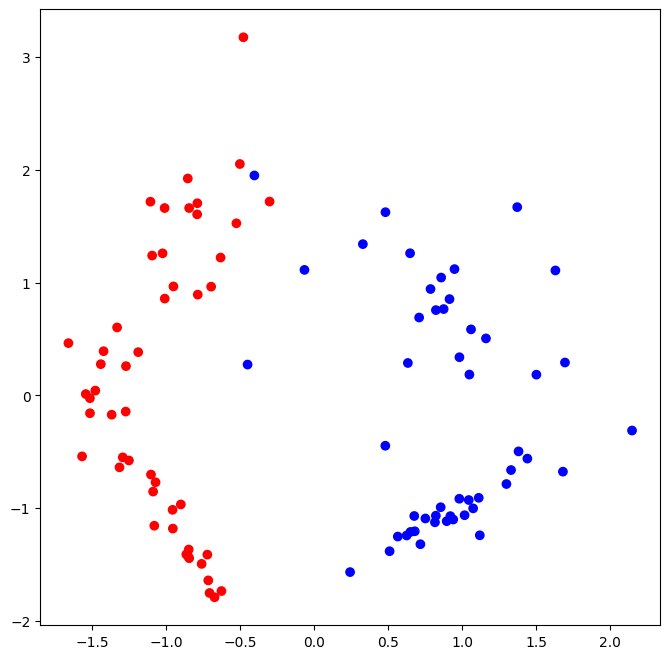

In [297]:
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)
colors = ListedColormap(["red", "blue"])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

plt.show()

In [298]:
np.random.seed(0)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


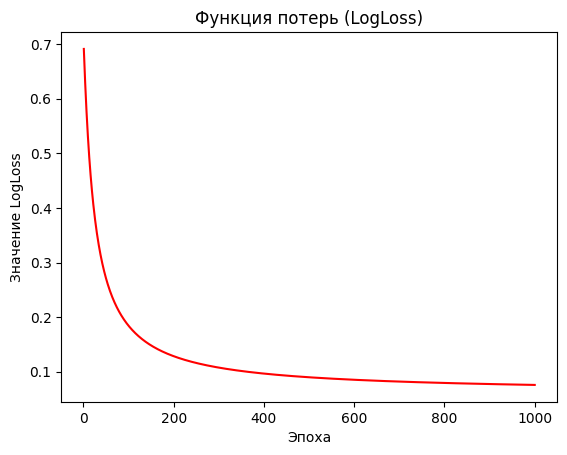

In [299]:
model = LogisticRegression()
losses = model.fit(X_train, y_train)

plt.plot(range(1, 1000 + 1), losses, color = "red")
plt.title("Функция потерь (LogLoss)")
plt.xlabel("Эпоха")
plt.ylabel("Значение LogLoss")

plt.show()

In [300]:
y_predicted_test = model.predict(X_test)
y_predicted_train = model.predict(X_train)

train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test - y_test)*100.0)

print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Точность на обучающей выборке: 97.143
Точность на тестовой выборке: 100.000


In [301]:
model.W

array([4.53846861, 0.05441237])

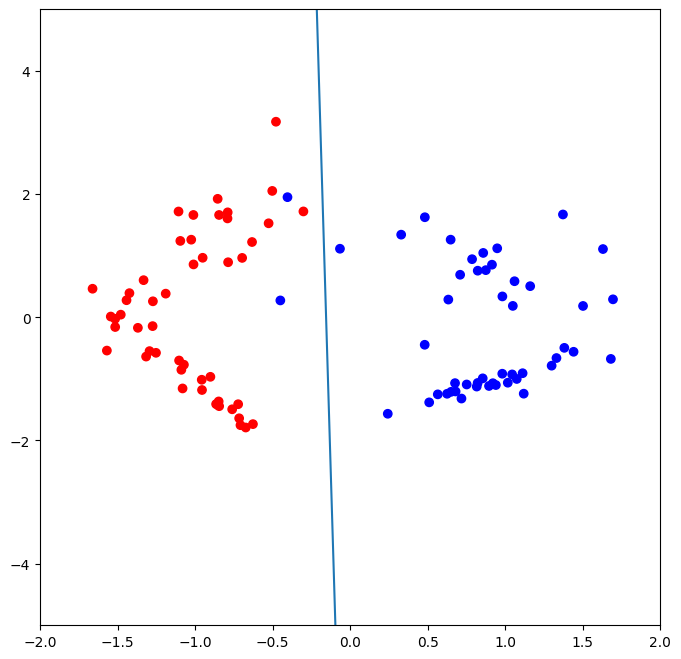

In [302]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 8))
plt.xlim(-2, 2)
plt.ylim(-5, 5)
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, (-model.W[0] * data - model.b) / model.W[1])

plt.show()